# Ejercicios de Autómatas Celulares 1D

## Setup

Corre el siguiente codigo para usarlo después. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualizar_evolucion(M, cmap="binary", titulo=None):
    """
    Dibuja una matriz M (tiempo x espacio) con imshow.
    """
    plt.figure(figsize=(6, 5))
    plt.imshow(M, cmap=cmap, interpolation="nearest", aspect="auto")
    plt.xlabel("Índice espacial i")
    plt.ylabel("Tiempo t (filas)")
    if titulo:
        plt.title(titulo)
    plt.show()

## Ejercicio 1: Tráfico con velocidad máxima 2 

Trabajamos con celdas binarias $x_i(t)\in\{0,1\}$, donde $1$ significa **auto** y $0$ **vacío**.
Frontera **periódica**: $x_{-1}(t)\equiv x_{N-1}(t)$ y $x_{N}(t)\equiv x_0(t)$.

**Regla (actualización sin colisiones, sincronizada):** Para cada auto en la posición $i$ al tiempo $t$:
1. Si las dos celdas de enfrente están vacías ($x_{i+1}(t)=0$ y $x_{i+2}(t)=0$), el auto avanza **dos** posiciones.
2. Si sólo la de enfrente está vacía ($x_{i+1}(t)=0$), avanza **una** posición.
3. En caso contrario, **se queda**.

Implementa:

- `paso_trafico_v2(x)` que devuelve el estado en $t+1$ a partir de `x` en $t$.
- `evolucion_trafico_v2(estado_inicial, pasos)` que acumula la evolución en una matriz.

Sugerencia para el vecino derecho con módulo: `x[(i+1) % N]` y `x[(i+2) % N]`.


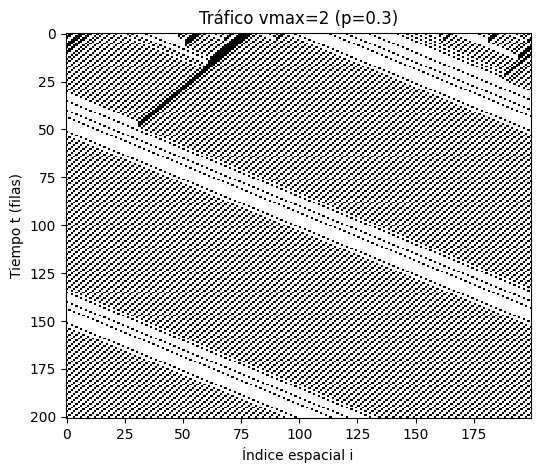

In [ ]:
def paso_trafico_v2(x: np.ndarray) -> np.ndarray:
    """
    Realiza un paso de actualización del modelo de tráfico con velocidad máxima 2.

    Cada celda puede estar vacía (0) o contener un auto (1).
    Se asume frontera periódica (la pista es un anillo).

    Reglas de movimiento:
    1. Si las dos celdas de adelante están vacías, el auto avanza 2 posiciones.
    2. Si solo la celda inmediata está vacía, avanza 1 posición.
    3. Si ambas están ocupadas, se queda en su lugar.

    La actualización es sincrónica: todas las decisiones se basan en el estado
    actual (t) y se registran en un nuevo arreglo `y` para el estado (t+1).

    Parámetros
    ----------
    x : np.ndarray
        Arreglo 1D con los valores {0, 1} representando el estado actual de la carretera.

    Retorna
    -------
    np.ndarray
        Arreglo 1D con el nuevo estado del sistema después de un paso temporal.
    """

    N = len(x)
    y = np.zeros(N, dtype=np.uint8)
    # COMPLETA AQUÍ
    
    return y

def evolucion_trafico_v2(estado_inicial: np.ndarray, pasos: int) -> np.ndarray:
    """
    Genera la evolución temporal del modelo de tráfico con velocidad máxima 2.

    Aplica iterativamente la función `paso_trafico_v2` y almacena cada estado
    en una matriz, donde cada fila representa el sistema en un tiempo distinto.

    Parámetros
    ----------
    estado_inicial : np.ndarray
        Arreglo 1D con los estados iniciales de las celdas (0 = vacío, 1 = auto).
    pasos : int
        Número total de pasos de tiempo a simular.

    Retorna
    -------
    np.ndarray
        Matriz de tamaño (pasos+1, N) con la evolución completa del sistema.
        La primera fila corresponde al estado inicial.
    """

    x = np.asarray(estado_inicial, dtype=np.uint8)
    N = len(x)
    M = np.zeros((pasos+1, N), dtype=np.uint8)
    M[0] = x
    for t in range(pasos):
        x = paso_trafico_v2(x)
        M[t+1] = x
    return M

def estado_aleatorio_binario(N: int, p: float) -> np.ndarray:
    """
    Genera un estado inicial aleatorio binario para el modelo de tráfico.

    Cada celda toma el valor 1 (auto) con probabilidad p y 0 (vacío) con probabilidad (1-p).

    Parámetros
    ----------
    N : int
        Número total de celdas (longitud de la carretera).
    p : float
        Probabilidad de que una celda esté ocupada por un auto.

    Retorna
    -------
    np.ndarray
        Arreglo 1D de longitud N con valores binarios (0 o 1).
    """

    return (np.random.rand(N) < p).astype(np.uint8)

N, T = 200, 200
x0 = estado_aleatorio_binario(N, p=0.3)
M = evolucion_trafico_v2(x0, T)
visualizar_evolucion(M, cmap="binary", titulo="Tráfico vmax=2 (p=0.3)")


## Preguntas

- Usa las mismas condiciones inciales que el ejercicio de la Actividad 7 y comenta las diferencias. 

## Ejercicio 2: Fuego 1D con 3 estados

Este modelo representa la propagación de un incendio forestal en una línea de árboles (una dimensión). Cada celda del autómata representa un árbol, que puede estar en tres estados: sano, ardiéndose o quemado.
La evolución en el tiempo describe cómo el fuego se propaga de un árbol a otro: un árbol sano puede encenderse si alguno de sus vecinos está en llamas, los árboles que arden eventualmente se queman por completo, y los árboles quemados permanecen así.

Este modelo, aunque simple, permite visualizar cómo se expanden los incendios en un entorno lineal y cómo la dinámica local (la interacción con los vecinos inmediatos) puede generar patrones de propagación globales.

Estados por celda:
- **0**: árbol **sano** (verde)
- **1**: árbol **ardiéndose** (rojo)
- **2**: árbol **quemado** (negro)

**Regla determinista (perímetro de fuego):**
1. Si una celda está **ardiéndose** en $t$, en $t+1$ pasa a **quemado**.
2. Si una celda está **sana** y **algún vecino** (izq o der) está **ardiéndose** en $t$, entonces en $t+1$ pasa a **ardiéndose**.
3. Si está **quemada**, permanece quemada. Si está **sana** y no hay fuego al lado, permanece sana.

### Colores para el bosque

Usaremos un `ListedColormap` con:
- Verde para **sano** (`#2ca02c`),
- Rojo para **ardiéndose** (`#d62728`),
- Negro para **quemado** (`#111111`).

Así, `cmap_bosque = ListedColormap(["#2ca02c", "#d62728", "#111111"])`.


Implementa:

- `paso_fuego(x)` que aplica la regla anterior.
- `evolucion_fuego(estado_inicial, pasos)` que acumula la evolución.

Crea también un estado inicial con **unos cuantos focos** de fuego (1) dispersos en un bosque **sano** (0).


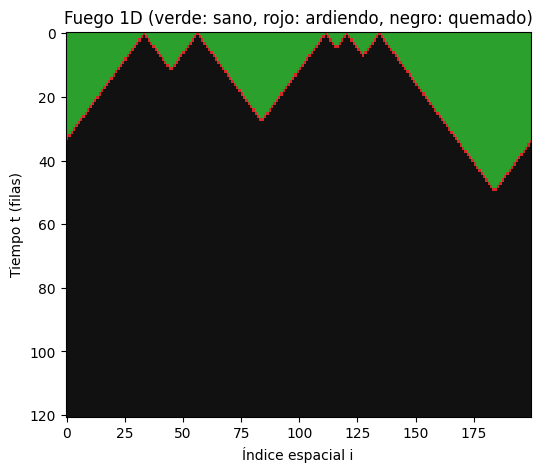

In [ ]:
from matplotlib.colors import ListedColormap
cmap_bosque = ListedColormap(["#2ca02c", "#d62728", "#111111"])

def paso_fuego(x: np.ndarray) -> np.ndarray:
    """
    Realiza un paso de actualización del modelo de fuego unidimensional.

    Cada celda representa un árbol que puede estar en uno de tres estados:
    - 0: árbol sano (verde)
    - 1: árbol ardiendo (rojo)
    - 2: árbol quemado (negro)

    Regla de evolución (determinista):
    1. Un árbol ardiendo pasa a quemado en el siguiente paso.
    2. Un árbol sano se enciende si al menos uno de sus vecinos (izquierda o derecha)
       está ardiendo en el estado actual.
    3. Los árboles quemados permanecen en ese estado.

    Se asume frontera periódica (la celda 0 es vecina de la última).

    Parámetros
    ----------
    x : np.ndarray
        Arreglo unidimensional con los estados actuales de los árboles.

    Retorna
    -------
    np.ndarray
        Arreglo con el nuevo estado del sistema después de un paso temporal.
    """

    N = len(x)
    y = np.zeros(N, dtype=np.uint8)
    # COMPLETA AQUÍ
    return y

def evolucion_fuego(estado_inicial: np.ndarray, pasos: int) -> np.ndarray:
    """
    Genera la evolución temporal del modelo de fuego durante varios pasos.

    Aplica repetidamente la función `paso_fuego` para construir una matriz
    donde cada fila representa el estado del bosque en un instante de tiempo.

    Parámetros
    ----------
    estado_inicial : np.ndarray
        Arreglo 1D con los estados iniciales de los árboles (valores 0, 1, 2).
    pasos : int
        Número total de pasos temporales a simular.

    Retorna
    -------
    np.ndarray
        Matriz de tamaño (pasos+1, N) con la evolución completa del sistema.
        La primera fila corresponde al estado inicial.
    """

    # COMPLETA AQUÍ
    return M

def bosque_inicial(N: int, num_focos: int = 3, semilla: int | None = None) -> np.ndarray:
    """
    Genera un estado inicial para el modelo de fuego 1D.

    El bosque se representa como una línea de N árboles inicialmente sanos (estado 0),
    excepto por algunos focos de incendio iniciales (estado 1) elegidos al azar.

    Parámetros
    ----------
    N : int
        Número total de árboles (longitud del bosque).
    num_focos : int, opcional
        Número de árboles que comienzan ardiendo (por defecto 3).
    semilla : int o None, opcional
        Semilla para el generador aleatorio (permite reproducibilidad).

    Retorna
    -------
    np.ndarray
        Arreglo 1D de longitud N con valores:
        - 0 para árboles sanos,
        - 1 para árboles ardiendo,
        - 2 no aparece al inicio (solo durante la evolución).
    """

    rng = np.random.default_rng(semilla)
    x0 = np.zeros(N, dtype=np.uint8)   # todo sano
    focos = rng.choice(N, size=num_focos, replace=False)
    x0[focos] = 1                      # prender algunos focos
    return x0

N, T = 200, 120
x0 = bosque_inicial(N, num_focos=5)
M = evolucion_fuego(x0, T)
visualizar_evolucion(M, cmap=cmap_bosque, titulo="Fuego 1D (verde: sano, rojo: ardiendo, negro: quemado)")


## Preguntas

- Para una cantidad de focos de fuego 5 simula el experimentos 100 veces y obten el tiempo promedio en el cual todo el bosque queda completamente quemado.
- Repite el punto anterior pero para focos de incencidio entre 1 y 10. Haz una grafica de el numero de focos de incendio vs el tiempo promedio en el cual todo el bosque queda completamente quemado.
- ¿Qué puedes decir de la gráfica anteriror?
- ¿Qué otras hipotesis se le pueden agregar al modelo para hacerlo más realista?

## Ejercicio 3: Tráfico **mixto**: autos de velocidad 1 y velocidad 2
En este modelo se simula el **flujo vehicular en una carretera unidimensional**, donde los autos avanzan de manera sincronizada sobre una pista circular (frontera periódica). Cada celda del autómata representa una posición posible en la carretera y puede estar vacía o ocupada por un vehículo.

Se distinguen dos tipos de autos: **lentos** y **rápidos**, con velocidades máximas de 1 y 2 celdas por paso de tiempo, respectivamente. El objetivo es observar cómo la interacción entre ambos tipos de vehículos afecta la **dinámica del tráfico**, generando fenómenos como ondas de congestión o agrupamientos espontáneos.

El modelo, aunque sencillo, permite explorar cómo las reglas locales de movimiento y las restricciones de espacio pueden reproducir comportamientos complejos de sistemas de transporte reales.

Estados por celda:
- **0**: vacío
- **1**: auto **lento** (v=1)
- **2**: auto **rápido** (v=2)

**Regla sincronizada (dos fases para evitar colisiones):**  
- **Fase A (rápidos a 2):** cada auto **rápido** intenta avanzar **2** celdas si ambas están vacías (en el estado $t$). Si lo logra, se mueve 2 y su destino queda reservado.  
- **Fase B (resto a 1):** los **rápidos** que no se movieron en Fase A, y todos los **lentos**, intentan avanzar **1** celda si está vacía **y no reservada** por la Fase A. Si no pueden, se quedan.


Implementa:

- `paso_trafico_mixto(x)`  
- `evolucion_trafico_mixto(estado_inicial, pasos)`

Genera condiciones iniciales con densidades separadas para lentos y rápidos (por ejemplo $p_{\text{lento}}=0.15$, $p_{\text{rápido}}=0.15$).


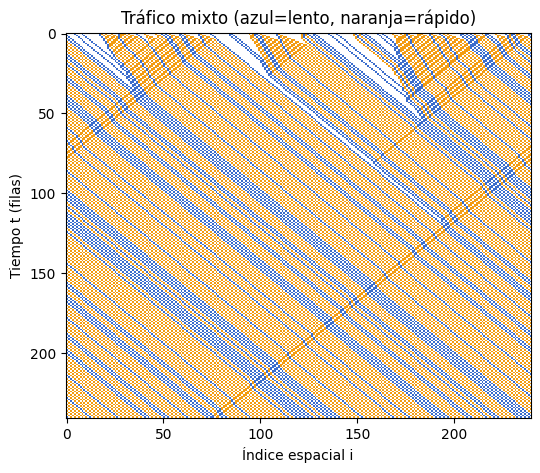

In [ ]:
from matplotlib.colors import ListedColormap
cmap_mixto = ListedColormap(["#ffffff", "#3b6dcc", "#f39c12"])  # blanco=vacío, azul=lento, naranja=rápido

def paso_trafico_mixto(x: np.ndarray) -> np.ndarray:
    """
    Realiza un paso de actualización del modelo de tráfico mixto (autos lentos y rápidos).

    Cada celda puede estar vacía (0), contener un auto lento (1) o un auto rápido (2).
    La actualización es sincrónica y consta de dos fases:
    - Fase A: los autos rápidos intentan avanzar 2 celdas si ambas están vacías.
    - Fase B: los rápidos que no se movieron y los autos lentos intentan avanzar 1 celda
      si la celda siguiente está libre y no reservada por la fase A.

    Parámetros
    ----------
    x : np.ndarray
        Arreglo unidimensional de enteros {0, 1, 2} representando el estado actual
        de la carretera (frontera periódica).

    Retorna
    -------
    np.ndarray
        Nuevo arreglo con el estado de la carretera después de un paso temporal.
    """
    N = len(x)
    y = np.zeros(N, dtype=np.uint8)
    reservado = np.zeros(N, dtype=bool)  # destinos ocupados por fase A
    # COMPLETA AQUÍ
    # Fase A: rápidos intentan mover 2
    
    
    # Fase B: rápidos restantes y lentos intentan mover 1
    
    return y

def evolucion_trafico_mixto(estado_inicial: np.ndarray, pasos: int) -> np.ndarray:
    """
    Genera la evolución temporal del modelo de tráfico mixto durante varios pasos.

    Aplica repetidamente la función `paso_trafico_mixto` para construir una matriz
    donde cada fila representa el estado de la carretera en un instante de tiempo.

    Parámetros
    ----------
    estado_inicial : np.ndarray
        Arreglo 1D con los estados iniciales (0, 1, 2) de cada celda.
    pasos : int
        Número total de pasos temporales a simular.

    Retorna
    -------
    np.ndarray
        Matriz de tamaño (pasos+1, N) con la evolución completa del sistema.
        La primera fila corresponde al estado inicial.
    """
    x = np.asarray(estado_inicial, dtype=np.uint8)
    N = len(x)
    M = np.zeros((pasos+1, N), dtype=np.uint8)
    M[0] = x
    for t in range(pasos):
        x = paso_trafico_mixto(x)
        M[t+1] = x
    return M

def estado_inicial_mixto(N: int, p_lento: float = 0.15, p_rapido: float = 0.15, semilla: int | None = None) -> np.ndarray:
    """
    Genera un estado inicial aleatorio para el modelo de tráfico mixto.

    Asigna de forma independiente autos lentos y rápidos según las probabilidades
    especificadas, evitando superposición. Las celdas no ocupadas quedan vacías.

    Parámetros
    ----------
    N : int
        Número total de celdas (longitud de la carretera).
    p_lento : float, opcional
        Probabilidad de que una celda contenga un auto lento (por defecto 0.15).
    p_rapido : float, opcional
        Probabilidad de que una celda contenga un auto rápido (por defecto 0.15).
    semilla : int o None, opcional
        Semilla para el generador aleatorio, útil para reproducir resultados.

    Retorna
    -------
    np.ndarray
        Arreglo de longitud N con valores 0 (vacío), 1 (auto lento) y 2 (auto rápido).
    """
    rng = np.random.default_rng(semilla)
    x = np.zeros(N, dtype=np.uint8)
    mask_lento  = rng.random(N) < p_lento
    mask_rapido = (~mask_lento) & (rng.random(N) < p_rapido)
    x[mask_lento]  = 1
    x[mask_rapido] = 2
    return x

N, T = 240, 240
x0 = estado_inicial_mixto(N, p_lento=0.15, p_rapido=0.15, semilla=42)
M = evolucion_trafico_mixto(x0, T)
visualizar_evolucion(M, cmap=cmap_mixto, titulo="Tráfico mixto (azul=lento, naranja=rápido)")


## Preguntas

- Usa las mismas condiciones inciales que el ejercicio de la Actividad 7 y el ejercicio 1. 
- Comenta las diferencias con este modelo. 
- ¿Qué otras hipotesis se le pueden agregar al modelo para hacerlo más realista?